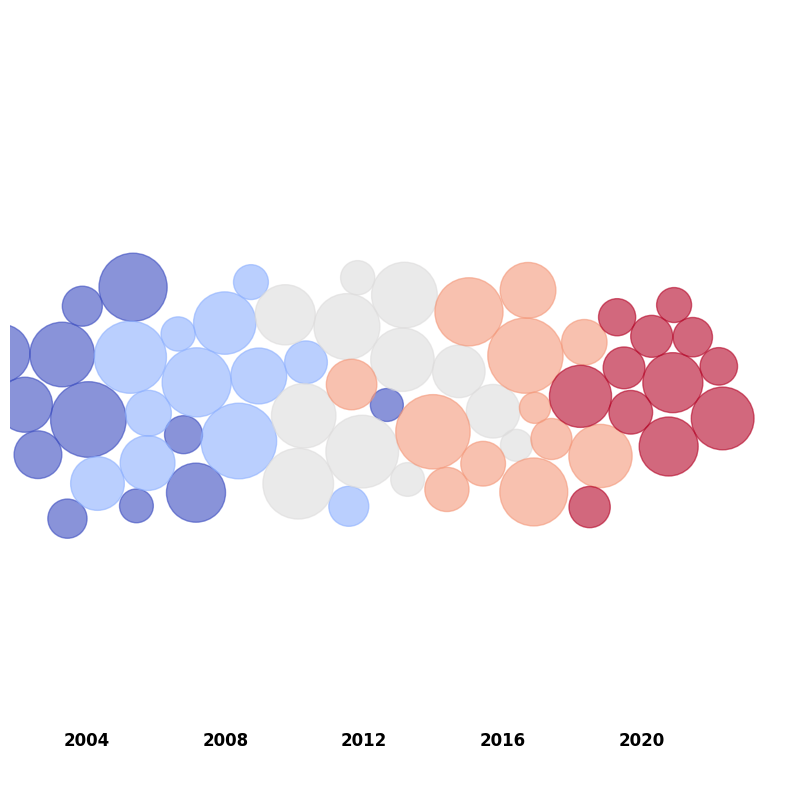

In [1]:


import numpy as np

import random

import math

import matplotlib.pyplot as plt

 

# --- Node class ---

class Node:

    def __init__(self, x, y, r, year):

        self.x = x

        self.y = y

        self.vx = 0

        self.vy = 0

        self.r = r

        self.year = year

 

def jiggle():

    return (random.random() - 0.5) * 1e-6

 

def force_collide(nodes, iterations=1, strength=1.0):

    n = len(nodes)

    for _ in range(iterations):

        for i in range(n):

            a = nodes[i]

            for j in range(i + 1, n):

                b = nodes[j]

                dx = (a.x + a.vx) - (b.x + b.vx)

                dy = (a.y + a.vy) - (b.y + b.vy)

                if dx == 0 and dy == 0:

                    dx = jiggle()

                    dy = jiggle()

                dist2 = dx * dx + dy * dy

                r = a.r + b.r

                if dist2 < r * r:

                    dist = math.sqrt(dist2)

                    if dist == 0:

                        dist = r - 1e-6

                    overlap = (r - dist) / dist * strength

                    dx *= overlap

                    dy *= overlap

                    w_a = b.r * b.r / (a.r * a.r + b.r * b.r)

                    w_b = 1 - w_a

                    a.vx += dx * w_a

                    a.vy += dy * w_a

                    b.vx -= dx * w_b

                    b.vy -= dy * w_b

    # Apply velocities

    for node in nodes:

        node.x += node.vx

        node.y += node.vy

        node.vx *= 0.8

        node.vy *= 0.8

 

# --- Setup: one column per election year ---

years = list(range(2004, 2024, 4))  # 2004, 2008, 2012, 2016, 2020

targets = {year: (0.1 + i * 0.18, 0.5) for i, year in enumerate(years)}

 

# --- Generate example nodes ---

np.random.seed(42)

nodes = []

for year in years:

    for _ in range(12):  # 12 bubbles per year

        x = np.random.rand()

        y = np.random.rand()

        r = np.random.uniform(0.02, 0.05)

        nodes.append(Node(x, y, r, year))

 

# --- Run simulation ---

for step in range(300):

    for node in nodes:

        # Each node is pulled toward its year's cluster center

        cx, cy = targets[node.year]

        node.vx += (cx - node.x) * 0.02

        node.vy += (cy - node.y) * 0.02

    force_collide(nodes, iterations=10, strength=0.7)

 

# --- Plot ---

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_aspect('equal')

ax.axis('off')

 

colors = plt.cm.coolwarm(np.linspace(0, 1, len(years)))

for year, color in zip(years, colors):

    for node in [n for n in nodes if n.year == year]:

        ax.add_patch(plt.Circle((node.x, node.y), node.r, color=color, alpha=0.6))

    # Label each column

    cx, cy = targets[year]

    ax.text(cx, 0.05, str(year), ha='center', va='center', fontsize=12, weight='bold')

 

plt.show()

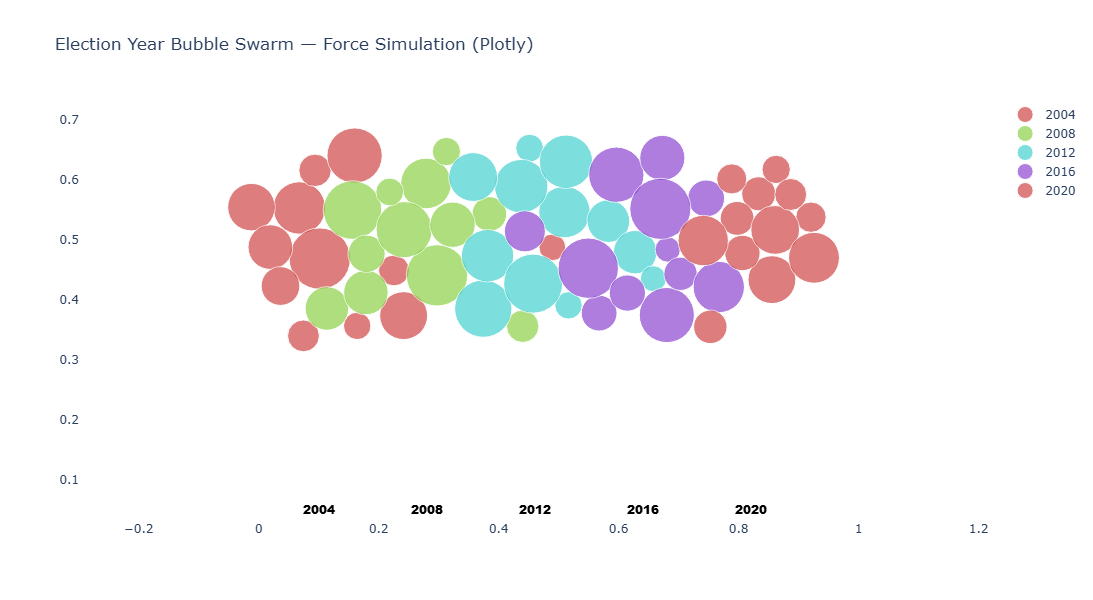

In [7]:
import numpy as np
import random
import math
import plotly.graph_objects as go

# --- Node class ---
class Node:
    def __init__(self, x, y, r, year):
        self.x = x
        self.y = y
        self.vx = 0
        self.vy = 0
        self.r = r
        self.year = year

def jiggle():
    return (random.random() - 0.5) * 1e-6

def force_collide(nodes, iterations=1, strength=1.0):
    n = len(nodes)
    for _ in range(iterations):
        for i in range(n):
            a = nodes[i]
            for j in range(i + 1, n):
                b = nodes[j]
                dx = (a.x + a.vx) - (b.x + b.vx)
                dy = (a.y + a.vy) - (b.y + b.vy)
                if dx == 0 and dy == 0:
                    dx = jiggle()
                    dy = jiggle()
                dist2 = dx * dx + dy * dy
                r = a.r + b.r
                if dist2 < r * r:
                    dist = math.sqrt(dist2)
                    if dist == 0:
                        dist = r - 1e-6
                    overlap = (r - dist) / dist * strength
                    dx *= overlap
                    dy *= overlap
                    w_a = b.r * b.r / (a.r * a.r + b.r * b.r)
                    w_b = 1 - w_a
                    a.vx += dx * w_a
                    a.vy += dy * w_a
                    b.vx -= dx * w_b
                    b.vy -= dy * w_b

    # Apply velocities
    for node in nodes:
        node.x += node.vx
        node.y += node.vy
        node.vx *= 0.8
        node.vy *= 0.8


# --- Setup: one column per election year ---
years = list(range(2004, 2024, 4))
targets = {year: (0.1 + i * 0.18, 0.5) for i, year in enumerate(years)}

# --- Generate example nodes ---
np.random.seed(42)
nodes = []
for year in years:
    for _ in range(12):
        x = np.random.rand()
        y = np.random.rand()
        r = np.random.uniform(0.02, 0.05)
        nodes.append(Node(x, y, r, year))

# --- Run simulation ---
for step in range(300):
    for node in nodes:
        cx, cy = targets[node.year]
        node.vx += (cx - node.x) * 0.02
        node.vy += (cy - node.y) * 0.02
    force_collide(nodes, iterations=10, strength=0.7)

# --- Convert to DataFrame-like structure for Plotly ---
data = {
    "x": [n.x for n in nodes],
    "y": [n.y for n in nodes],
    "r": [n.r * 100 for n in nodes],  # scale radius for Plotly
    "year": [n.year for n in nodes]
}

# --- Plot with Plotly ---
fig = go.Figure()

colors = np.linspace(0, 1, len(years))
color_map = {year: f"hsl({int(360 * c)}, 60%, 55%)" for year, c in zip(years, colors)}

# Scale factor for marker pixels (experiment)
marker_scale = 1250  # increase until circles visibly overlap

for year in years:
    x = [n.x for n in nodes if n.year == year]
    y = [n.y for n in nodes if n.year == year]
    r = [n.r * marker_scale for n in nodes if n.year == year]
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode="markers",
        marker=dict(
            size=r,
            color=color_map[year],
            opacity=0.7,
            line=dict(width=1, color="white"),
            sizemode="diameter"
        ),
        name=str(year),
        hovertemplate="<b>Year:</b> %{text}<br>X: %{x:.2f}<br>Y: %{y:.2f}<extra></extra>",
        text=[year] * len(x)
    ))


# Add year labels
for year in years:
    cx, cy = targets[year]
    fig.add_annotation(
        x=cx,
        y=0.05,
        text=str(year),
        showarrow=False,
        font=dict(size=12, color="black", family="Arial Black"),
        yanchor="middle"
    )

# --- Layout ---
fig.update_layout(
    title="Election Year Bubble Swarm — Force Simulation (Plotly)",
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    plot_bgcolor="white",
    width=900,
    height=600,
    showlegend=True
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)

fig.show()


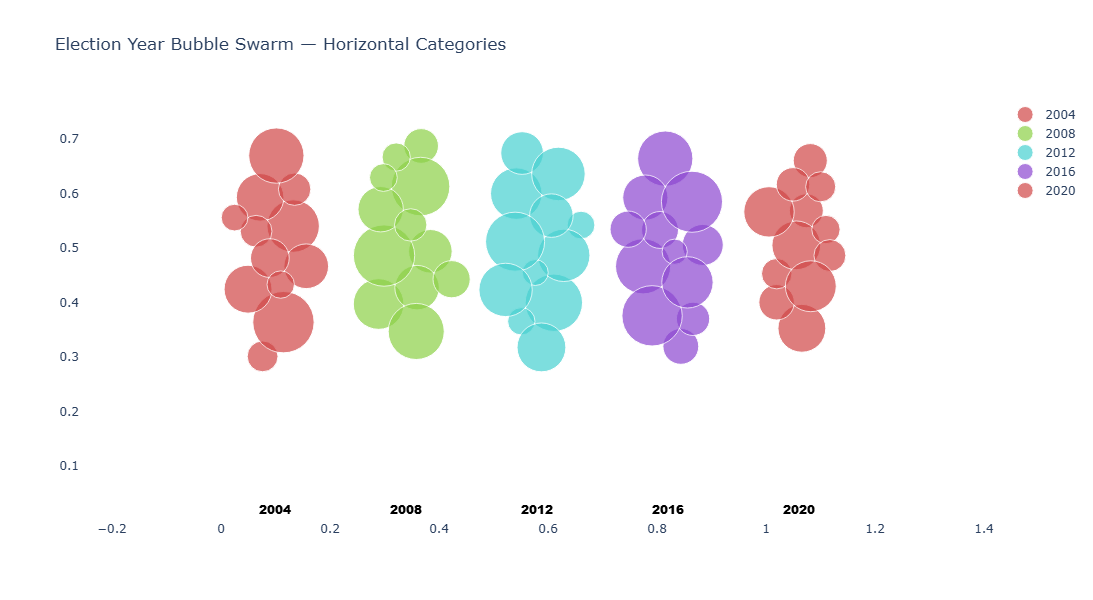

In [12]:
import numpy as np
import random
import math
import plotly.graph_objects as go

# --- Node class ---
class Node:
    def __init__(self, x, y, r, year):
        self.x = x
        self.y = y
        self.vx = 0
        self.vy = 0
        self.r = r
        self.year = year

def jiggle():
    return (random.random() - 0.5) * 1e-6

def force_collide(nodes, iterations=1, strength=1.0):
    n = len(nodes)
    for _ in range(iterations):
        for i in range(n):
            a = nodes[i]
            for j in range(i + 1, n):
                b = nodes[j]
                dx = (a.x + a.vx) - (b.x + b.vx)
                dy = (a.y + a.vy) - (b.y + b.vy)
                if dx == 0 and dy == 0:
                    dx = jiggle()
                    dy = jiggle()
                dist2 = dx * dx + dy * dy
                r = a.r + b.r
                if dist2 < r * r:
                    dist = math.sqrt(dist2)
                    if dist == 0:
                        dist = r - 1e-6
                    overlap = (r - dist) / dist * strength
                    dx *= overlap
                    dy *= overlap
                    w_a = b.r * b.r / (a.r * a.r + b.r * b.r)
                    w_b = 1 - w_a
                    a.vx += dx * w_a
                    a.vy += dy * w_a
                    b.vx -= dx * w_b
                    b.vy -= dy * w_b

    for node in nodes:
        node.x += node.vx
        node.y += node.vy
        node.vx *= 0.8
        node.vy *= 0.8

# --- Setup: one horizontal band per year ---
years = list(range(2004, 2024, 4))
# Horizontal spacing between categories
targets = {year: (0.1 + i * 0.24, 0.5) for i, year in enumerate(years)}  # cx is horizontal

# --- Generate example nodes ---
np.random.seed(42)
nodes = []
for year in years:
    for _ in range(12):
        x = np.random.rand()  # start random
        y = np.random.rand()
        r = np.random.uniform(0.02, 0.05)
        nodes.append(Node(x, y, r, year))

# --- Run simulation ---
for step in range(300):
    for node in nodes:
        cx, cy = targets[node.year]
        node.vx += (cx - node.x) * 0.05  # horizontal pull toward category
        node.vy += (0.5 - node.y) * 0.01  # vertical jitter/swarm
    force_collide(nodes, iterations=5, strength=0.8)

# --- Convert for Plotly ---
colors = np.linspace(0, 1, len(years))
color_map = {year: f"hsl({int(360 * c)}, 60%, 55%)" for year, c in zip(years, colors)}
marker_scale = 1250

fig = go.Figure()
for year in years:
    x = [n.x for n in nodes if n.year == year]
    y = [n.y for n in nodes if n.year == year]
    r = [n.r * marker_scale for n in nodes if n.year == year]
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode="markers",
        marker=dict(
            size=r,
            color=color_map[year],
            opacity=0.7,
            line=dict(width=1, color="white"),
            sizemode="diameter"
        ),
        name=str(year),
        hovertemplate="<b>Year:</b> %{text}<br>X: %{x:.2f}<br>Y: %{y:.2f}<extra></extra>",
        text=[year] * len(x)
    ))

# --- Add year labels below each horizontal band ---
for year in years:
    cx, cy = targets[year]
    fig.add_annotation(
        x=cx,
        y=0.02,
        text=str(year),
        showarrow=False,
        font=dict(size=12, color="black", family="Arial Black"),
        yanchor="middle"
    )

# --- Layout ---
fig.update_layout(
    title="Election Year Bubble Swarm — Horizontal Categories",
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    plot_bgcolor="white",
    width=900,
    height=600,
    showlegend=True
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)

fig.show()


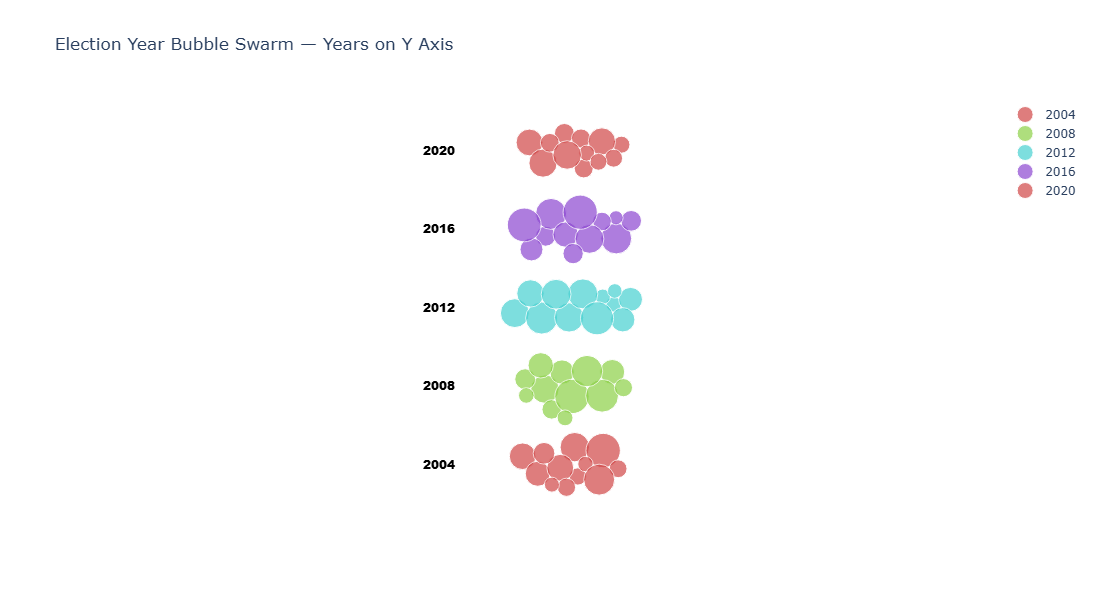

In [21]:
import numpy as np
import random
import math
import plotly.graph_objects as go

# --- Node class ---
class Node:
    def __init__(self, x, y, r, year):
        self.x = x
        self.y = y
        self.vx = 0
        self.vy = 0
        self.r = r
        self.year = year

def jiggle():
    return (random.random() - 0.5) * 1e-6

def force_collide(nodes, iterations=1, strength=1.0):
    n = len(nodes)
    for _ in range(iterations):
        for i in range(n):
            a = nodes[i]
            for j in range(i + 1, n):
                b = nodes[j]
                dx = (a.x + a.vx) - (b.x + b.vx)
                dy = (a.y + a.vy) - (b.y + b.vy)
                if dx == 0 and dy == 0:
                    dx = jiggle()
                    dy = jiggle()
                dist2 = dx * dx + dy * dy
                r = a.r + b.r
                if dist2 < r * r:
                    dist = math.sqrt(dist2)
                    if dist == 0:
                        dist = r - 1e-6
                    overlap = (r - dist) / dist * strength
                    dx *= overlap
                    dy *= overlap
                    w_a = b.r * b.r / (a.r * a.r + b.r * b.r)
                    w_b = 1 - w_a
                    a.vx += dx * w_a
                    a.vy += dy * w_a
                    b.vx -= dx * w_b
                    b.vy -= dy * w_b

    for node in nodes:
        node.x += node.vx
        node.y += node.vy
        node.vx *= 0.8
        node.vy *= 0.8

# --- Setup: one horizontal band per year (now on Y axis) ---
years = list(range(2004, 2024, 4))
# Vertical spacing between years
targets = {year: (0.5, 0.1 + i * 0.25) for i, year in enumerate(years)}  # cy is vertical

# --- Generate example nodes ---
np.random.seed(42)
nodes = []
for year in years:
    for _ in range(12):
        x = np.random.rand()
        y = np.random.rand()
        r = np.random.uniform(0.02, 0.05)
        nodes.append(Node(x, y, r, year))

# --- Run simulation ---
for step in range(300):
    for node in nodes:
        cx, cy = targets[node.year]
        node.vx += (cx - node.x) * 0.01  # horizontal pull toward center
        node.vy += (cy - node.y) * 0.05  # vertical pull toward year band
    force_collide(nodes, iterations=5, strength=0.8)

# --- Convert for Plotly ---
colors = np.linspace(0, 1, len(years))
color_map = {year: f"hsl({int(360 * c)}, 60%, 55%)" for year, c in zip(years, colors)}
marker_scale = 700

fig = go.Figure()
for year in years:
    x = [n.x for n in nodes if n.year == year]
    y = [n.y for n in nodes if n.year == year]
    r = [n.r * marker_scale for n in nodes if n.year == year]
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode="markers",
        marker=dict(
            size=r,
            color=color_map[year],
            opacity=0.7,
            line=dict(width=1, color="white"),
            sizemode="diameter"
        ),
        name=str(year),
        hovertemplate="<b>Year:</b> %{text}<br>X: %{x:.2f}<br>Y: %{y:.2f}<extra></extra>",
        text=[year] * len(x)
    ))

# --- Add year labels to left of each horizontal band ---
for year in years:
    cx, cy = targets[year]
    fig.add_annotation(
        x=0.02,
        y=cy,
        text=str(year),
        showarrow=False,
        font=dict(size=12, color="black", family="Arial Black"),
        xanchor="left",
        yanchor="middle"
    )

# --- Layout ---
fig.update_layout(
    title="Election Year Bubble Swarm — Years on Y Axis",
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showticklabels=False  # hide X-axis labels
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showticklabels=False  # hide Y-axis labels
    ),
    plot_bgcolor="white",
    width=500,
    height=600,
    showlegend=True
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_yaxes(scaleanchor="x", scaleratio=1)

fig.show()


               expiration_date  days_to_expire
769 2025-11-04 08:39:14.208700             2.0
718 2025-10-31 08:39:14.208700            -2.0
714 2025-11-01 08:39:14.208700            -1.0
758 2025-11-04 08:39:14.208700             2.0
730 2025-11-03 08:39:14.208700             1.0
782 2025-11-06 08:39:14.208700             4.0
738 2025-11-07 08:39:14.208700             5.0
707 2025-11-09 08:39:14.208700             7.0
736 2025-11-01 08:39:14.208700            -1.0
741 2025-11-10 08:39:14.208700             8.0
767 2025-11-08 08:39:14.208700             6.0
753 2025-11-01 08:39:14.208700            -1.0
759 2025-11-01 08:39:14.208700            -1.0
698 2025-11-11 08:39:14.208700             9.0
701 2025-11-11 08:39:14.208700             9.0
698 2025-11-04 08:39:14.208700             2.0
765 2025-10-30 08:39:14.208700            -3.0
724 2025-11-05 08:39:14.208700             3.0
733 2025-11-10 08:39:14.208700             8.0
768 2025-10-30 08:39:14.208700            -3.0
700 2025-11-0

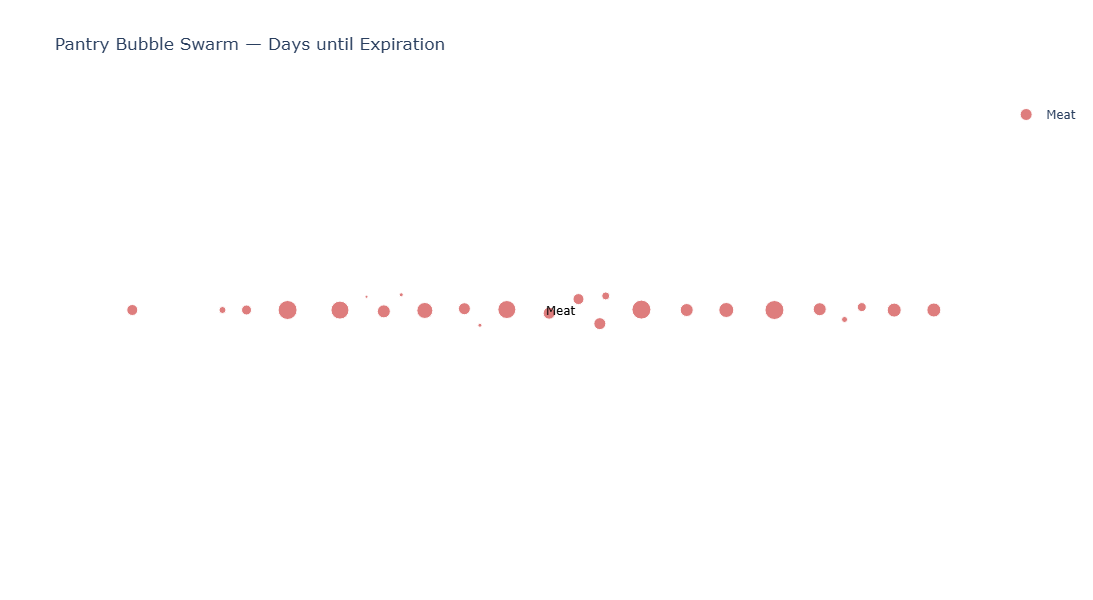

In [30]:
import numpy as np
import random
import math
import plotly.graph_objects as go
from datetime import datetime, timedelta
import pandas as pd

# --- Node class ---
class Node:
    def __init__(self, x, y, r, category, label):
        self.x = x
        self.y = y
        self.vx = 0
        self.vy = 0
        self.r = r
        self.category = category
        self.label = label

def jiggle():
    return (random.random() - 0.5) * 1e-6

def force_collide(nodes, iterations=1, strength=1.0):
    n = len(nodes)
    for _ in range(iterations):
        for i in range(n):
            a = nodes[i]
            for j in range(i + 1, n):
                b = nodes[j]
                dx = (a.x + a.vx) - (b.x + b.vx)
                dy = (a.y + a.vy) - (b.y + b.vy)
                if dx == 0 and dy == 0:
                    dx = jiggle()
                    dy = jiggle()
                dist2 = dx * dx + dy * dy
                r = a.r + b.r
                if dist2 < r * r:
                    dist = math.sqrt(dist2)
                    if dist == 0:
                        dist = r - 1e-6
                    overlap = (r - dist) / dist * strength
                    dx *= overlap
                    dy *= overlap
                    w_a = b.r * b.r / (a.r * a.r + b.r * b.r)
                    w_b = 1 - w_a
                    a.vx += dx * w_a
                    a.vy += dy * w_a
                    b.vx -= dx * w_b
                    b.vy -= dy * w_b

    for node in nodes:
        node.x += node.vx
        node.y += node.vy
        node.vx *= 0.8
        node.vy *= 0.8

# --- Generate random pantry ---
def generate_random_pantry(products_df):
    meats = products_df[products_df['category'].str.contains("Meat, Seafood & Plant-Based", case=False, na=False)].sample(25, replace=True)
   # veggies = products_df[products_df['category'].str.contains("Fresh Fruits & Veggies", case=False, na=False)].sample(25, replace=True)
    
    meats['category'] = "Meat"
    #veggies['category'] = "Veggies"
    
    pantry = pd.concat([meats]).copy()
    pantry['quantity'] = np.random.randint(1, 20, len(pantry))
    days_offset = np.random.randint(-3, 10, len(pantry))
    pantry['expiration_date'] = pd.Timestamp.now() + pd.to_timedelta(days_offset, unit='d')
    #print(pantry['expiration_date'])
    pantry['days_to_expire'] = (pantry['expiration_date'] - pd.Timestamp.now()).dt.total_seconds() / 86400.0
    print(pantry[['expiration_date','days_to_expire']])

    return pantry.reset_index(drop=True)

# Load your CSV
products_df = pd.read_csv(r"C:\Users\broth\Documents\GitHub\team-no-food-waste-for-you\streamlit_app\pages\trader_joes_products.csv")
pantry_df = generate_random_pantry(products_df)

# --- Set up category bands for Y axis ---
categories = pantry_df['category'].unique()
category_spacing = 1.5
targets = {cat: (0.5, 0.1 + i*category_spacing) for i, cat in enumerate(categories)}

# --- Create nodes ---
nodes = []
for _, row in pantry_df.iterrows():
    nodes.append(Node(
        x=row['days_to_expire'],
        y=targets[row['category']][1] + np.random.uniform(-0.1, 0.1),  # jitter
        r=row['quantity'] / 5,
        category=row['category'],
        label=row.get('product_name', '')
    ))
    nodes[-1].days_to_expire = row['days_to_expire']

# --- Run simulation ---
for step in range(300):
    for node in nodes:
        cx, cy = targets[node.category]
        node.vx += (node.x - node.x) * 0.01  # horizontal anchor (could also pull toward original X)
        node.vy += (cy - node.y) * 0.05     # vertical gravity toward category band
        
    force_collide(nodes, iterations=5, strength=0.8)

# --- Plot with Plotly ---
marker_scale = 5
colors = np.linspace(0, 1, len(categories))
color_map = {cat: f"hsl({int(360 * c)}, 60%, 55%)" for cat, c in zip(categories, colors)}

fig = go.Figure()
for cat in categories:
    x = [n.x for n in nodes if n.category == cat]
    y = [n.y for n in nodes if n.category == cat]
    r = [n.r * marker_scale for n in nodes if n.category == cat]
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode="markers",
        marker=dict(
            size=r,
            color=color_map[cat],
            opacity=0.7,
            line=dict(width=1, color="white"),
            sizemode="diameter"
        ),
        name=cat,
        #hovertemplate="<b>%{text}</b><br>Days until Expiration: %{x:.1f}<br>Qty: %{customdata}<extra></extra>",
        text=[n.label for n in nodes if n.category == cat],
        customdata=[n.days_to_expire for n in nodes if n.category == cat],
        hovertemplate="<b>%{text}</b><br>Days until Expiration: %{customdata:.1f}<br>Qty: %{marker.size}<extra></extra>"

    ))

# --- Add category labels ---
for cat in categories:
    fig.add_annotation(
        x=0,
        y=targets[cat][1],
        text=cat,
        showarrow=False,
        xanchor="left",
        yanchor="middle",
        font=dict(size=12, color="black")
    )

# --- Layout ---
fig.update_layout(
    title="Pantry Bubble Swarm — Days until Expiration",
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor="white",
    width=700,
    height=600,
    showlegend=True
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.show()


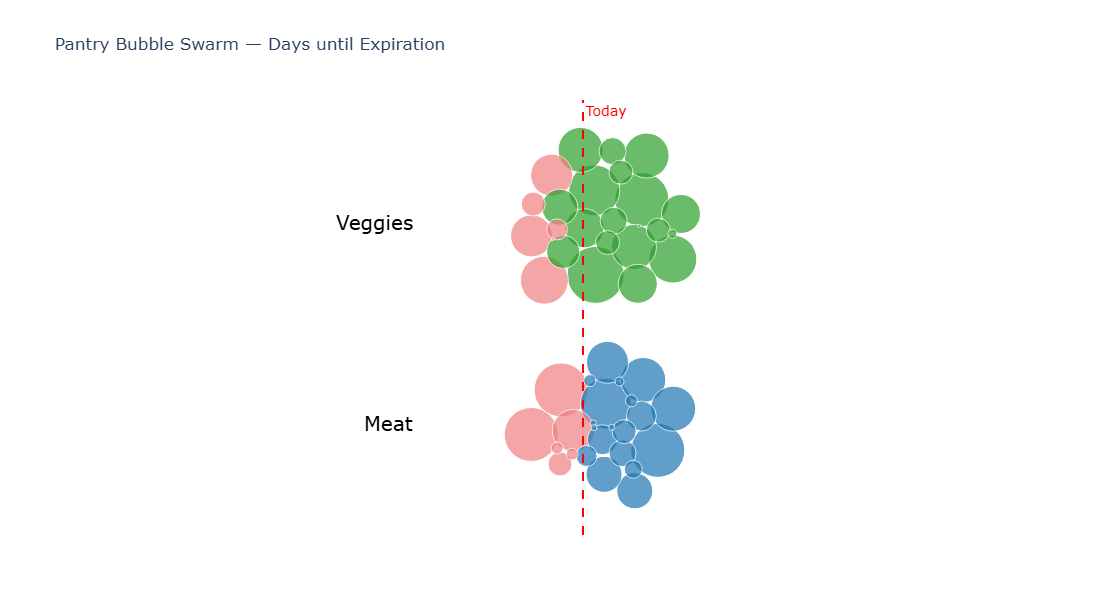

In [66]:
import numpy as np
import random
import math
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta
import pandas as pd

# --- Node class ---
class Node:
    def __init__(self, x, y, r, category, label, days_to_expire):
        self.x = x
        self.y = y
        self.vx = 0
        self.vy = 0
        self.r = r
        self.category = category
        self.label = label
        self.days_to_expire = days_to_expire  # keep true X value

def jiggle():
    return (random.random() - 0.5) * 1e-6

def force_collide(nodes, iterations=1, strength=1.0):
    n = len(nodes)
    for _ in range(iterations):
        for i in range(n):
            a = nodes[i]
            for j in range(i + 1, n):
                b = nodes[j]
                dx = (a.x + a.vx) - (b.x + b.vx)
                dy = (a.y + a.vy) - (b.y + b.vy)
                if dx == 0 and dy == 0:
                    dx = jiggle()
                    dy = jiggle()
                dist2 = dx * dx + dy * dy
                r = a.r + b.r
                if dist2 < r * r:
                    dist = math.sqrt(dist2)
                    if dist == 0:
                        dist = r - 1e-6
                    overlap = (r - dist) / dist * strength
                    dx *= overlap
                    dy *= overlap
                    w_a = b.r * b.r / (a.r * a.r + b.r * b.r)
                    w_b = 1 - w_a
                    a.vx += dx * w_a
                    a.vy += dy * w_a
                    b.vx -= dx * w_b
                    b.vy -= dy * w_b

    for node in nodes:
        node.x += node.vx
        node.y += node.vy
        node.vx *= 0.8
        node.vy *= 0.8

# --- Generate random pantry example ---
np.random.seed(42)
products_df = pd.read_csv(r"C:\Users\broth\Documents\GitHub\team-no-food-waste-for-you\streamlit_app\pages\trader_joes_products.csv")

def generate_random_pantry(products_df):
    meats = products_df[products_df['category'].str.contains("Meat, Seafood & Plant-Based", case=False, na=False)].sample(25, replace=True)
    veggies = products_df[products_df['category'].str.contains("Fresh Fruits & Veggies", case=False, na=False)].sample(25, replace=True)
    
    meats['category'] = "Meat"
    veggies['category'] = "Veggies"
    
    pantry = pd.concat([meats, veggies]).copy()
    pantry['quantity'] = np.random.randint(1, 20, len(pantry))
    pantry['expiration_date'] = [
        datetime.now() + timedelta(days=np.random.randint(-3, 10))
        for _ in range(len(pantry))
    ]
    pantry['days_to_expire'] = (pantry['expiration_date'] - pd.Timestamp.now()).dt.total_seconds() / 86400.0
    return pantry.reset_index(drop=True)

pantry_df = generate_random_pantry(products_df)

# --- Set up category bands ---
categories = pantry_df['category'].unique()
category_spacing = 30
targets = {cat: (0.5, 0.1 + i*category_spacing) for i, cat in enumerate(categories)}

# --- Create nodes sorted by quantity (largest first) ---
pantry_df = pantry_df.sort_values('quantity', ascending=False)
nodes = []
for _, row in pantry_df.iterrows():
    nodes.append(Node(
        x=row['days_to_expire'],
        y=targets[row['category']][1] + np.random.uniform(-0.1, 0.1),  # larger initial jitter
        r=row['quantity'] / 5,
        category=row['category'],
        label=row.get('product_name', ''),
        days_to_expire=row['days_to_expire']
    ))
    nodes[-1].days_to_expire = row['days_to_expire']
# --- Run force simulation with more Y stacking and left/right bias ---
for step in range(300):
    for node in nodes:
        cx, cy = targets[node.category]

        # Horizontal pull toward true X
        node.vx += (node.days_to_expire - node.x) * 0.3

        # Vertical pull toward category
        node.vy += (cy - node.y) * 0.15                   

        # Bias to ensure node stays on correct side of 0 line
        if node.days_to_expire < 0:
            # Expired items -> nudge left if they cross zero
            node.vx += min(0, node.days_to_expire - node.x) * 0.3
        else:
            # Not expired -> nudge right if they cross zero
            node.vx += max(0, node.days_to_expire - node.x) * 0.3

    force_collide(nodes, iterations=10, strength=0.8)

# --- Define a fixed palette for categories (up to 10) ---
palette = [
    "#1f77b4",  # blue
    "#2ca02c",  # green
    "#9467bd",  # purple
    "#ff7f0e",  # orange
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#17becf",  # teal
    "#bcbd22",  # lime-ish yellow
    "#aec7e8"   # light blue
]

# Map categories to colors
category_colors = {cat: palette[i % len(palette)] for i, cat in enumerate(categories)}

fig = go.Figure()

# Add vertical line for "0 days until expiration"
fig.add_vline(
    x=0,
    line=dict(color="red", width=2, dash="dash"),
    annotation_text="Today",
    annotation_position="top right",
    annotation_font=dict(color="red", size=14)
)

marker_scale = 15

for cat in categories:
    x = [n.x for n in nodes if n.category == cat]
    y = [n.y for n in nodes if n.category == cat]
    r = [n.r * marker_scale for n in nodes if n.category == cat]
    # Determine colors: light red for expired, normal category color otherwise
    colors = [ "lightcoral" if n.days_to_expire < 0 else category_colors[cat] 
               for n in nodes if n.category == cat ]
    
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode="markers",
        marker=dict(
            size=r,
            color=colors,
            opacity=0.7,
            line=dict(width=1, color="white"),
            sizemode="diameter"
        ),
        name=cat,
        text=[n.label for n in nodes if n.category == cat],
        customdata=[n.days_to_expire for n in nodes if n.category == cat],
        hovertemplate="<b>%{text}</b><br>Days until Expiration: %{customdata:.1f}<br>Qty: %{marker.size}<extra></extra>"
    ))

# --- Add category labels to the left ---
for cat in categories:
    fig.add_annotation(
        x=-25,
        y=targets[cat][1],
        text=cat,
        showarrow=False,
        xanchor="right",
        yanchor="middle",
        font=dict(size=20, color="black")
    )

# --- Layout ---
fig.update_layout(
    title="Pantry Bubble Swarm — Days until Expiration",
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor="white",
    width=1200,
    height=600,
    showlegend=False
)

x_margin = 2  # extra days on each side
xmin = pantry_df['days_to_expire'].min() - x_margin
xmax = pantry_df['days_to_expire'].max() + x_margin
#fig.update_xaxes(range=[xmin, xmax])
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.show()

In [79]:
import numpy as np
import random
import math
import plotly.graph_objects as go
from datetime import datetime, timedelta
import pandas as pd

# --- Node class ---
class Node:
    def __init__(self, x, y, r, category, label, days_to_expire):
        self.x = x
        self.y = y
        self.vx = 0
        self.vy = 0
        self.r = r
        self.category = category
        self.label = label
        self.days_to_expire = days_to_expire

def jiggle():
    return (random.random() - 0.5) * 1e-6

# --- Conditional collision: only collide if X distance < threshold ---
def force_collide_conditional(nodes, iterations=1, strength=1.0, x_threshold=15):
    n = len(nodes)
    for _ in range(iterations):
        for i in range(n):
            a = nodes[i]
            for j in range(i + 1, n):
                b = nodes[j]

                # Only collide if horizontally close
                if abs(a.x - b.x) > x_threshold:
                    continue

                dx = (a.x + a.vx) - (b.x + b.vx)
                dy = (a.y + a.vy) - (b.y + b.vy)
                if dx == 0 and dy == 0:
                    dx = jiggle()
                    dy = jiggle()
                dist2 = dx*dx + dy*dy
                r = a.r + b.r
                if dist2 < r*r:
                    dist = math.sqrt(dist2)
                    if dist == 0:
                        dist = r - 1e-6
                    overlap = (r - dist) / dist * strength
                    dx *= overlap
                    dy *= overlap
                    w_a = b.r*b.r / (a.r*a.r + b.r*b.r)
                    w_b = 1 - w_a
                    a.vx += dx * w_a
                    a.vy += dy * w_a
                    b.vx -= dx * w_b
                    b.vy -= dy * w_b

    for node in nodes:
        node.x += node.vx
        node.y += node.vy
        node.vx *= 0.8
        node.vy *= 0.8

# --- Generate random pantry ---
np.random.seed(42)
products_df = pd.read_csv(r"C:\Users\broth\Documents\GitHub\team-no-food-waste-for-you\streamlit_app\pages\trader_joes_products.csv")

def generate_random_pantry(products_df):
    meats = products_df[products_df['category'].str.contains("Meat, Seafood & Plant-Based", case=False, na=False)].sample(25, replace=True)
    veggies = products_df[products_df['category'].str.contains("Fresh Fruits & Veggies", case=False, na=False)].sample(25, replace=True)
    
    meats['category'] = "Meat"
    veggies['category'] = "Veggies"
    
    pantry = pd.concat([meats, veggies]).copy()
    pantry['quantity'] = np.random.randint(1, 20, len(pantry))
    pantry['expiration_date'] = [
        datetime.now() + timedelta(days=np.random.randint(-3, 10), hours=np.random.randint(0, 24)))
        for _ in range(len(pantry))
    ]
    pantry['days_to_expire'] = (pantry['expiration_date'] - pd.Timestamp.now()).dt.total_seconds() / 86400.0
    return pantry.reset_index(drop=True)

pantry_df = generate_random_pantry(products_df)

# --- Set up category bands ---
categories = pantry_df['category'].unique()
category_spacing = 30
targets = {cat: (0.5, 0.1 + i*category_spacing) for i, cat in enumerate(categories)}

# --- Create nodes sorted by quantity (largest first) ---
pantry_df = pantry_df.sort_values('quantity', ascending=False)
nodes = []
for _, row in pantry_df.iterrows():
    nodes.append(Node(
        x=row['days_to_expire'],
        y=targets[row['category']][1] + np.random.uniform(-0.1, 0.1),
        r=row['quantity'] / 5,
        category=row['category'],
        label=row.get('product_name', ''),
        days_to_expire=row['days_to_expire']
    ))

# --- Run force simulation ---
for step in range(300):
    for node in nodes:
        cx, cy = targets[node.category]
        # Pull toward true X
        node.vx += (node.days_to_expire - node.x) * 0.3
        # Pull toward category band vertically
        node.vy += (cy - node.y) * 0.15

    # Conditional collision only if X is close
    force_collide_conditional(nodes, iterations=5, strength=0.8, x_threshold=0)

# --- Define category colors (avoid red shades) ---
palette = [
    "#1f77b4", "#2ca02c", "#9467bd", "#ff7f0e", "#8c564b",
    "#e377c2", "#7f7f7f", "#17becf", "#bcbd22", "#aec7e8"
]
category_colors = {cat: palette[i % len(palette)] for i, cat in enumerate(categories)}

# --- Plot ---
fig = go.Figure()

# Add vertical line for today
fig.add_vline(
    x=0,
    line=dict(color="red", width=2, dash="dash"),
    annotation_text="Today",
    annotation_position="top right",
    annotation_font=dict(color="red", size=14)
)

marker_scale = 15

for cat in categories:
    x = [n.x for n in nodes if n.category == cat]
    y = [n.y for n in nodes if n.category == cat]
    r = [n.r * marker_scale for n in nodes if n.category == cat]
    colors = ["lightcoral" if n.days_to_expire < 0 else category_colors[cat] for n in nodes if n.category == cat]
    
    fig.add_trace(go.Scatter(
        x=x, y=y, mode="markers",
        marker=dict(size=r, color=colors, opacity=0.7, line=dict(width=1,color="white"), sizemode="diameter"),
        name=cat,
        text=[n.label for n in nodes if n.category == cat],
        customdata=[n.days_to_expire for n in nodes if n.category == cat],
        hovertemplate="<b>%{text}</b><br>Days until Expiration: %{customdata:.1f}<br>Qty: %{marker.size}<extra></extra>"
    ))

# Add category labels to the left
for cat in categories:
    fig.add_annotation(
        x=-25,
        y=targets[cat][1],
        text=cat,
        showarrow=False,
        xanchor="right",
        yanchor="middle",
        font=dict(size=20, color="black")
    )

# Expand X-axis for better spacing
x_margin = 3
xmin = pantry_df['days_to_expire'].min() - x_margin
xmax = pantry_df['days_to_expire'].max() + x_margin
fig.update_xaxes(range=[xmin, xmax])

# Layout
fig.update_layout(
    title="Pantry Bubble Swarm — Days until Expiration",
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor="white",
    width=1000,
    height=600,
    showlegend=False
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.show()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 161)

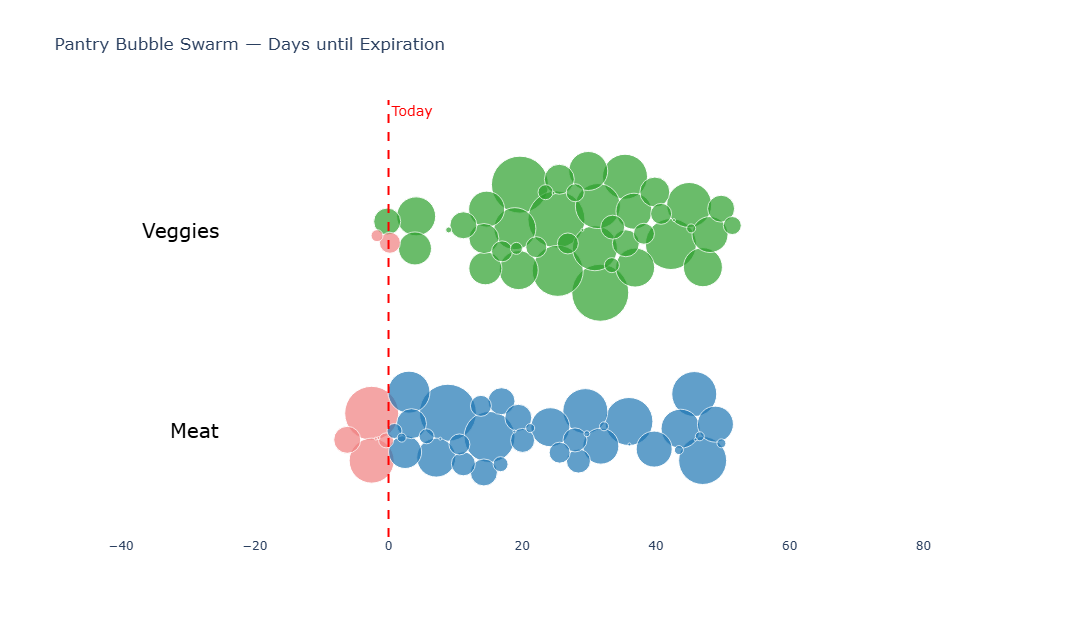

In [87]:
import numpy as np
import random
import math
import plotly.graph_objects as go
from datetime import datetime, timedelta
import pandas as pd

# --- Node class ---
class Node:
    def __init__(self, x, y, r, category, label, days_to_expire):
        self.x = x
        self.y = y
        self.vx = 0
        self.vy = 0
        self.r = r
        self.category = category
        self.label = label
        self.days_to_expire = days_to_expire

def jiggle():
    return (random.random() - 0.5) * 1e-6

# --- Collision ---
def force_collide(nodes, iterations=1, strength=1.0):
    n = len(nodes)
    for _ in range(iterations):
        for i in range(n):
            a = nodes[i]
            for j in range(i + 1, n):
                b = nodes[j]
                dx = (a.x + a.vx) - (b.x + b.vx)
                dy = (a.y + a.vy) - (b.y + b.vy)
                if dx == 0 and dy == 0:
                    dx = jiggle()
                    dy = jiggle()
                dist2 = dx*dx + dy*dy
                r = a.r + b.r
                if dist2 < r*r:
                    dist = math.sqrt(dist2)
                    if dist == 0:
                        dist = r - 1e-6
                    overlap = (r - dist) / dist * strength
                    dx *= overlap
                    dy *= overlap
                    w_a = b.r*b.r / (a.r*a.r + b.r*b.r)
                    w_b = 1 - w_a
                    a.vx += dx * w_a
                    a.vy += dy * w_a
                    b.vx -= dx * w_b
                    b.vy -= dy * w_b
    for node in nodes:
        node.x += node.vx
        node.y += node.vy
        node.vx *= 0.8
        node.vy *= 0.8

# --- Generate random pantry ---
np.random.seed(42)
products_df = pd.read_csv(r"C:\Users\broth\Documents\GitHub\team-no-food-waste-for-you\web_scraper\trader_joes_products_v2.csv")

def generate_random_pantry(products_df):
    meats = products_df[products_df['category'].str.contains("Meat, Seafood & Plant-Based", case=False, na=False)].sample(45, replace=True)
    veggies = products_df[products_df['category'].str.contains("Fresh Fruits & Veggies", case=False, na=False)].sample(45, replace=True)
    meats['category'] = "Meat"
    veggies['category'] = "Veggies"
    pantry = pd.concat([meats, veggies]).copy()
    pantry['quantity'] = np.random.randint(1, 20, len(pantry))
    pantry['expiration_date'] = [
        datetime.now() + timedelta(days=np.random.randint(-3, 50), hours=np.random.randint(0,24))
        for _ in range(len(pantry))
    ]
    pantry['days_to_expire'] = (pantry['expiration_date'] - pd.Timestamp.now()).dt.total_seconds() / 86400.0
    return pantry.reset_index(drop=True)

pantry_df = generate_random_pantry(products_df)

# --- Category bands ---
categories = pantry_df['category'].unique()
category_spacing = 30
targets = {cat: (0.5, 0.1 + i*category_spacing) for i, cat in enumerate(categories)}

# --- Nodes ---
pantry_df = pantry_df.sort_values('quantity', ascending=False)
nodes = []
for _, row in pantry_df.iterrows():
    nodes.append(Node(
        x=row['days_to_expire'],
        y=targets[row['category']][1] + np.random.uniform(-0.1, 0.1),
        r=row['quantity'] / 5,
        category=row['category'],
        label=row.get('product_name', ''),
        days_to_expire=row['days_to_expire']
    ))

# --- Gravity centers ---
def get_gravity_hub(x, hub_spacing=1.0):
    """Round to nearest hub (1 day spacing by default)."""
    return round(x / hub_spacing) * hub_spacing

# --- Force simulation with gravity hubs ---
for step in range(300):
    for node in nodes:
        cx, cy = targets[node.category]

        # Vertical pull toward category band
        node.vy += (cy - node.y) * 0.15

        # Pull toward nearest gravity hub (rounded days)
        hub_x = get_gravity_hub(node.days_to_expire, hub_spacing=1.0)
        node.vx += (hub_x - node.x) * 0.3

    # Repel overlapping nodes
    force_collide(nodes, iterations=5, strength=0.8)

# --- Colors ---
palette = ["#1f77b4","#2ca02c","#9467bd","#ff7f0e","#8c564b","#e377c2","#7f7f7f","#17becf","#bcbd22","#aec7e8"]
category_colors = {cat: palette[i % len(palette)] for i, cat in enumerate(categories)}

# --- Plot ---
fig = go.Figure()
fig.add_vline(
    x=0,
    line=dict(color="red", width=2, dash="dash"),
    annotation_text="Today",
    annotation_position="top right",
    annotation_font=dict(color="red", size=14)
)

marker_scale = 15

for cat in categories:
    x = [n.x for n in nodes if n.category==cat]
    y = [n.y for n in nodes if n.category==cat]
    r = [n.r * marker_scale for n in nodes if n.category==cat]
    colors = ["lightcoral" if n.days_to_expire < 0 else category_colors[cat] for n in nodes if n.category==cat]

    fig.add_trace(go.Scatter(
        x=x, y=y, mode="markers",
        marker=dict(size=r, color=colors, opacity=0.7, line=dict(width=1,color="white"), sizemode="diameter"),
        name=cat,
        text=[n.label for n in nodes if n.category==cat],
        customdata=[n.days_to_expire for n in nodes if n.category==cat],
        hovertemplate="<b>%{text}</b><br>Days until Expiration: %{customdata:.1f}<br>Qty: %{marker.size}<extra></extra>"
    ))

# Category labels
for cat in categories:
    fig.add_annotation(
        x=-25, y=targets[cat][1],
        text=cat, showarrow=False,
        xanchor="right", yanchor="middle",
        font=dict(size=20, color="black")
    )

# Expand X-axis
x_margin = 3
# --- Stretch X-axis range ---
x_margin = 8  # increase margin on each side for more spread
xmin = pantry_df['days_to_expire'].min() - x_margin
xmax = pantry_df['days_to_expire'].max() + x_margin

# Update X-axis
fig.update_xaxes(range=[xmin, xmax])
fig.update_layout(width=1400)  # make figure wider


# Layout
fig.update_layout(
    title="Pantry Bubble Swarm — Days until Expiration",
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor="white",
    width=1200,
    height=600,
    showlegend=False
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.show()
